In [1]:
# ライブラリの読み込み
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
# Google Deiveへのアクセス設定
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 別途作成した虎/猫の判別モデル（model_tigercat.h5）を読み込み
model_loc = './model/model_tigercat.h5'
model = load_model(model_loc)

Metal device set to: Apple M1


2022-01-26 11:47:31.373615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-26 11:47:31.374363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# 分類テストをしたい画像を引数imgとし、モデルに基づいてtiger/catに分類する関数
def classify_tiger(img):
  classes = ['cat', 'tiger']
  pic = Image.open(img)
  pic = pic.convert('RGB')
  pic = pic.resize((100, 100))
  pic = np.asarray(pic)
  classified_prob = model.predict(np.array([pic]))
  # 虎の場合1、猫の場合0
  is_tiger = np.argmax(classified_prob)
  # モデルによる分類結果と分類される確率を表示
  print('Classified into:\t{}'.format(classes[is_tiger]))
  print('Probability:\t\t{:.3f}'.format(classified_prob.max()))

モデル作成の教師データに含まれない画像で分類テストを実施

例1

In [ ]:
classify_tiger('/content/drive/My Drive/picture/test/test_cat_1.jpeg')

Classified into:	cat
Probability:		0.936


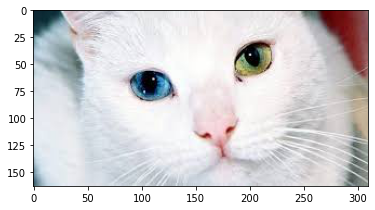

In [ ]:
plt.imshow(np.asarray(Image.open('/content/drive/My Drive/picture/test/test_cat_1.jpeg')))

例2

In [6]:
classify_tiger('./img/tiger.jpg')

Classified into:	tiger
Probability:		0.779


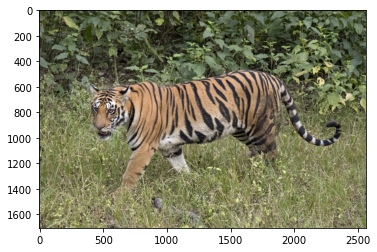

In [10]:
plt.imshow(np.asarray(Image.open('/content/drive/My Drive/picture/test/test_tiger_1.jpeg')))

例3

In [ ]:
classify_tiger('/content/drive/My Drive/picture/test/test_cat_2.jpeg')

Classified into:	cat
Probability:		0.999


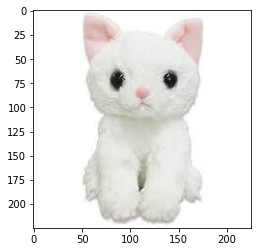

In [ ]:
plt.imshow(np.asarray(Image.open('/content/drive/My Drive/picture/test/test_cat_2.jpeg')))

例4

In [ ]:
classify_tiger('/content/drive/My Drive/picture/test/test_tiger_2.jpeg')

Classified into:	tiger
Probability:		0.790


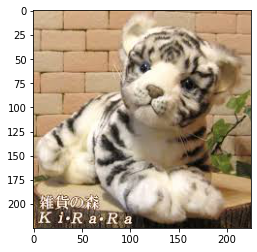

In [ ]:
plt.imshow(np.asarray(Image.open('/content/drive/My Drive/picture/test/test_tiger_2.jpeg')))

例5

In [ ]:
classify_tiger('/content/drive/My Drive/picture/test/test_cat_3.jpeg')

Classified into:	cat
Probability:		1.000


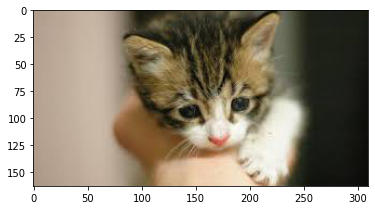

In [ ]:
plt.imshow(np.asarray(Image.open('/content/drive/My Drive/picture/test/test_cat_3.jpeg')))